In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from learntools.core import *
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor, XGBClassifier
from sklearn import model_selection, linear_model, metrics
from catboost import CatBoostRegressor, CatBoostClassifier



# Path of the file to read. We changed the directory structure to simplify submitting to a competition
titanic_file_path = '../input/train.csv'

home_data = pd.read_csv(titanic_file_path)


imputed_data = home_data.fillna(home_data.mean())

# Create target object and call it y
y = imputed_data.Survived
# Create X
features_X = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Parch', 'Embarked'] #,'Cabin','Embarked', 'SibSp','Parch',
X_dummies = pd.get_dummies(imputed_data[features_X])

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X_dummies, y, random_state=1)

# Make validation predictions and calculate mean absolute error
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y) 
val_predictions = iowa_model.predict(val_X)
m=0
while m < (len(val_predictions)):
    val_predictions[m] = round(val_predictions[m])
    #test_preds[m] = test_preds[m].astype(int)
    m = m+1 
val_predictions = val_predictions.astype(int)
#print(val_predictions)
#print(type(val_y.values))
#print(val_y.values)
val_mae = mean_absolute_error(val_predictions, val_y.values)
#print(val_mae)
print("Validation MAE when not specifying max_leaf_nodes:", val_mae)

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_predictions = val_predictions.astype(int)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes:", val_mae)

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y) 
rf_val_predictions = rf_model.predict(val_X)
rf_val_predictions = rf_val_predictions.astype(int)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print("Validation MAE for Random Forest Model:", rf_val_mae)

#XGB
xgb_model = XGBRegressor(n_estimators=1000)
xgb_model.fit(train_X, train_y, early_stopping_rounds=10, eval_set=[(val_X, val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_predictions = xgb_val_predictions.astype(int)
xgb_val_mae = mean_absolute_error(xgb_val_predictions, val_y.values)
print("Validation MAE for XGB Regressor Model:", xgb_val_mae)

#XGB Classifier
xgb_class_model = XGBClassifier(n_estimators=1000)
xgb_class_model.fit(train_X, train_y, early_stopping_rounds=10, eval_set=[(val_X, val_y)], verbose=False)
xgb_class_val_predictions = xgb_class_model.predict(val_X)
xgb_class_val_predictions = xgb_class_val_predictions.astype(int)
xgb_class_val_mae = mean_absolute_error(xgb_class_val_predictions, val_y.values)
print("Validation MAE for XGB Class Model:", xgb_class_val_mae)

#CatBoost
#catboost_model = CatBoostRegressor()
#catboost_model.fit(train_X, train_y)
#print(catboost_model.get_feature_importance(data=None,
#                       prettified=True,
#                       thread_count=-1,
#                       verbose=False))
#catboost_model_val_predictions = catboost_model.predict(val_X)
#catboost_model_val_mae = mean_absolute_error(catboost_model_val_predictions, val_y.values)
#print("Validation MAE for Catboost Model: {:,.0f}", catboost_model_val_mae)




xgb_model_on_full_data = XGBRegressor(n_estimators=1000)
#print(all_X_dummies.columns)
print(len(X_dummies.columns))
# fit rf_model_on_full_data on all data from the training data
xgb_model_on_full_data.fit(X_dummies, y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)

xgb_class_model_on_full_data = XGBClassifier(n_estimators=1000)
#print(all_X_dummies.columns)
print(len(X_dummies.columns))
# fit rf_model_on_full_data on all data from the training data
xgb_class_model_on_full_data.fit(X_dummies, y, early_stopping_rounds=10, eval_set=[(val_X, val_y)], verbose=False)

#catboost_model_on_full_data = CatBoostRegressor()
#print(len(X_dummies.columns))
#catboost_model_on_full_data.fit(X_dummies, y)




# path to file you will use for predictions
test_data_path = '../input/test.csv'
# read test data file using pandas
test_data = pd.read_csv(test_data_path)
#imputing
my_imputer = SimpleImputer()
new_imputed_data  = test_data.fillna(test_data.mode())

test_X = new_imputed_data[features_X]
test_X_dummies = pd.get_dummies(test_X)

test_preds = xgb_class_model_on_full_data.predict(test_X_dummies)

m=0
while m < (len(test_preds)):
    test_preds[m] = round(test_preds[m])
    #test_preds[m] = test_preds[m].astype(int)
    m = m+1 
test_preds = test_preds.astype(int)
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds})

output.to_csv('submission.csv', index=False)

Validation MAE when not specifying max_leaf_nodes: 0.24663677130044842
Validation MAE for best value of max_leaf_nodes: 0.28699551569506726
Validation MAE for Random Forest Model: 0.3094170403587444
Validation MAE for XGB Regressor Model: 0.4125560538116592
Validation MAE for XGB Class Model: 0.21524663677130046
10


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10


0


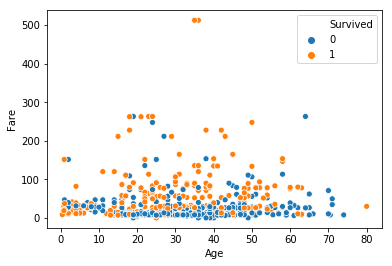

In [2]:
ver = 0.0324
definite = round(ver)
print(definite)

import seaborn as sns
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=home_data)
